<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

Download the webpage at the url


In [3]:
#your code goes here
# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data)

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table') # in html table is represented by the tag <table>
#Get all rows from the table
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    color_name = cols[1].getText() # store the value in column 3 as color_name
    color_salary = cols[3].getText() # store the value in column 4 as color_code
    print("{}--->{}".format(color_name,color_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
import pandas as pd

In [7]:
# your code goes here
language = []
salary = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language.append(cols[1].text)
    salary.append(cols[3].text)

df = pd.DataFrame({'Language Name': language, 'Average Salary': salary})
print(df)
#drop first row
df.drop(index=df.index[0], axis=0, inplace=True)
print(df)

   Language Name         Average Salary
0       Language  Average Annual Salary
1         Python               $114,383
2           Java               $101,013
3              R                $92,037
4     Javascript               $110,981
5          Swift               $130,801
6            C++               $113,865
7             C#                $88,726
8            PHP                $84,727
9            SQL                $84,793
10            Go                $94,082
   Language Name Average Salary
1         Python       $114,383
2           Java       $101,013
3              R        $92,037
4     Javascript       $110,981
5          Swift       $130,801
6            C++       $113,865
7             C#        $88,726
8            PHP        $84,727
9            SQL        $84,793
10            Go        $94,082


In [11]:
df.to_csv('popular-languages.csv')

In [17]:
df1 = df.assign(Salary=df['Average Salary'])
df1.head()

,Language Name,Average Salary,Salary
1,Python,"$114,383","$114,383"
2,Java,"$101,013","$101,013"
3,R,"$92,037","$92,037"
4,Javascript,"$110,981","$110,981"
5,Swift,"$130,801","$130,801"


In [18]:
df1['Salary'] = df1['Salary'].replace('[\$,]', '', regex=True).astype(float)
df1.head()

,Language Name,Average Salary,Salary
1,Python,"$114,383",114383.0
2,Java,"$101,013",101013.0
3,R,"$92,037",92037.0
4,Javascript,"$110,981",110981.0
5,Swift,"$130,801",130801.0


<AxesSubplot:xlabel='Language Name', ylabel='Salary in USD'>

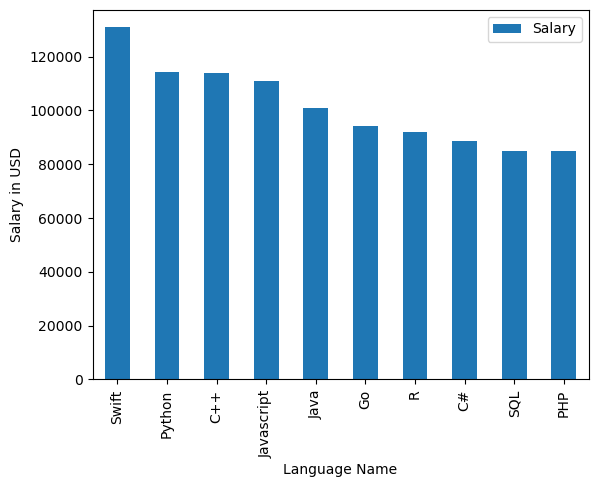

In [26]:
df1.sort_values(by='Salary', ascending=False).plot(kind='bar', x='Language Name', y='Salary', ylabel='Salary in USD')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
